# OneHotEncoding

## 先確認是否有 GPU

In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## 載入 MNIST 資料集

In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 訓練/測試資料的 x/y 維度確認

In [10]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### 查看訓練資料前 10 筆圖片的數字

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### 顯示第1張圖片內含值

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### 將非0的數字轉為 1, 顯示第 1 張圖片

In [15]:
data = x_train[0].copy()
data[data>0] = 1

- 將轉換後二維內容顯示出來

In [17]:
text_image = []
for i in range(data.shape[0]):
    text_image.append("".join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0

### 顯示第 1 筆資料圖像

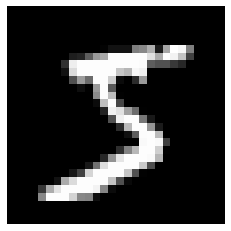

In [18]:
import matplotlib.pyplot as plt

X2 = x_train[0]
plt.imshow(X2.reshape(28, 28), cmap = "gray")
plt.axis("off")
plt.show()

## 特徵縮放
- 使用常態化 (Normalization)
- 注意: 顏色 0 為白色, 此與 RGB 顏色不同. (0,0,0) 為黑色

In [19]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 建立模型
- Dense : 完全連接的神經層
- Dropout (https://ithelp.ithome.com.tw/articles/10233758)

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = "softmax")
])

## 將 label 透過 one-hot-coding 轉成數字.

In [21]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [22]:
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [24]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## 設定優化器, 損失函數, 效能衡量指標的類別

In [25]:
model.compile(optimizer="adam",
                loss = "categorical_crossentropy",
                metrics = ["accuracy"]
                )

## 訓練

In [26]:
history = model.fit(x_train_norm, y_train, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3236 - accuracy: 0.9057 - val_loss: 0.1682 - val_accuracy: 0.9517
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1560 - accuracy: 0.9530 - val_loss: 0.1168 - val_accuracy: 0.9657
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1183 - accuracy: 0.9640 - val_loss: 0.1022 - val_accuracy: 0.9707
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0950 - accuracy: 0.9715 - val_loss: 0.0965 - val_accuracy: 0.9722
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0818 - accuracy: 0.9748 - val_loss: 0.0910 - val_accuracy: 0.9728


### 看一下 history 有存下哪些值

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 對訓練過程的準確度繪圖

d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39511 (\N{CJK UNIFIED IDEOGRAPH-9A57}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35657 (\N{CJK UNIFIED IDEOGRAPH-8B49}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 

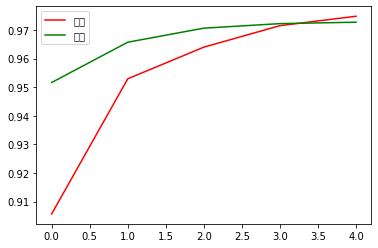

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], "r", label = "訓練")
plt.plot(history.history["val_accuracy"], "g", label = "驗證")
plt.legend()

## 對訓練過程的損失函數繪圖

d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 32244 (\N{CJK UNIFIED IDEOGRAPH-7DF4}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 39511 (\N{CJK UNIFIED IDEOGRAPH-9A57}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 35657 (\N{CJK UNIFIED IDEOGRAPH-8B49}) missing from current font.
  func(*args, **kwargs)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35347 (\N{CJK UNIFIED IDEOGRAPH-8A13}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\envs\dp1bk\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 

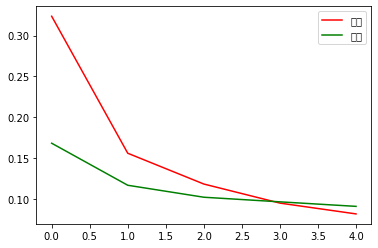

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], "r", label = "訓練")
plt.plot(history.history["val_loss"], "g", label = "驗證")
plt.legend()

## 評估, 打分數

In [30]:
score = model.evaluate(x_test_norm, y_test, verbose = 0)
score

[0.08154846727848053, 0.9733999967575073]

## 實際預測 20 筆

In [32]:
import numpy as np

predictions = np.argmax(model.predict(x_test_norm), axis = -1)
print("predictions:", predictions[0:20])
print("actual     :", np.argmax(y_test[0:20], axis = 1))

313/313 [==============================] - 0s 971us/step
predictions: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
actual     : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


## 一般第 8 張相片是容易出現錯誤, 這次是判對

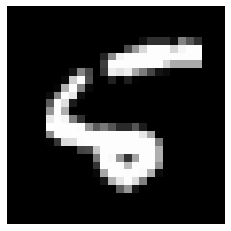

In [33]:
import matplotlib.pyplot

X2 = x_test[8]
plt.imshow(X2.reshape(28, 28), cmap = "gray")
plt.axis("off")
plt.show()

### 把這張照片的機率抓出來看

In [34]:
pred_prob = model.predict(x_test_norm)
np.around(pred_prob[8], 3)

313/313 [==============================] - 0s 747us/step


array([0.   , 0.   , 0.004, 0.   , 0.001, 0.889, 0.102, 0.   , 0.003,
       0.   ], dtype=float32)

## 自己用小畫家寫 0~9, 實際測測看

In [36]:
from skimage import io
from skimage.transform import resize
import numpy as np

uploaded_file = "./myDigits/1.png"
image1 = io.imread(uploaded_file, as_gray = True)
image_resized = resize(image1, (28, 28), anti_aliasing = True)
X1 = image_resized.reshape(1, 28, 28)

# 反轉顏色
X1 = np.abs(1-X1)

predictions = np.argmax(model.predict(X1), axis = -1)
print(predictions)

1/1 [==============================] - 0s 16ms/step
[1]


## 顯示模型的匯總資訊

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 模型存檔

In [38]:
model.save("model.h5")

## 模型載入

In [39]:
model = tf.keras.models.load_model("model.h5")

## 繪製模型

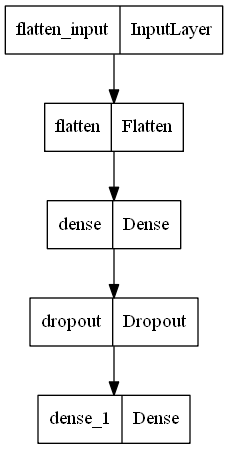

In [40]:
tf.keras.utils.plot_model(model, to_file = "model.png")